In [19]:
import pandas as pd
import numpy as np
import os
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
data_path = '/home/veeteque/InfoShare/Projekt_zczasem/LokalneProjekty/PythonStatystyka/DATA/'
os.chdir(data_path)

data_filename = 'Womens Clothing E-Commerce Reviews.csv'

DATA_SRC = pd.read_csv(data_path + data_filename, index_col = False)

In [21]:
#Zamiana kolumn z danymi kategorycznymi na dummy variables
divisionDummies = pd.get_dummies(DATA_SRC['Division Name'], prefix = 'Div')
departmentDummies = pd.get_dummies(DATA_SRC['Department Name'], prefix = 'Dept')
classDummies = pd.get_dummies(DATA_SRC['Class Name'], prefix = 'Class')

In [22]:
columnsDummiesClassToDrop = ['Class_Casual bottoms', 'Class_Chemises', 'Class_Dresses', 'Class_Sweaters']
classDummies.drop(columnsDummiesClassToDrop, axis = 1, inplace = True)

In [23]:
columnsDummiesDepartmentToDrop = ['Dept_Bottoms']
departmentDummies.drop(columnsDummiesDepartmentToDrop, axis = 1, inplace = True)

In [24]:
divisionDummiesColumns = list(divisionDummies.columns)
departmentDummiesColumns = list(departmentDummies.columns)
classDummiesColumns = list(classDummies.columns)
integerColumns = ['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count']

In [25]:
DATA_SRC.drop(['Unnamed: 0', 'Clothing ID', 'Title', 'Review Text'], axis = 1, inplace = True)
DATA_SRC = pd.concat([DATA_SRC, divisionDummies, departmentDummies, classDummies], axis = 1)
DATA_SRC.drop(['Division Name', 'Department Name', 'Class Name'], axis = 1, inplace = True)
DATA_SRC.dropna(inplace = True)

In [26]:
columnsSelected = divisionDummiesColumns + departmentDummiesColumns + classDummiesColumns + integerColumns

In [27]:
chi_square_value, p_value=calculate_bartlett_sphericity(DATA_SRC[columnsSelected])
print('Bartlett: chi2:', chi_square_value, 'p_value:', p_value)

kmo_all, kmo_model=calculate_kmo(DATA_SRC[columnsSelected])
print('k_model:', kmo_model)

Bartlett: chi2: 2548995.9127942934 p_value: 0.0
k_model: 0.12233075478245371


In [28]:
liczbaCzynnikow = 6

In [29]:
fa = FactorAnalyzer()
fa.analyze(DATA_SRC[columnsSelected], liczbaCzynnikow, rotation='varimax')
ev, v = fa.get_eigenvalues()
#print(ev, v)
#print(fa.loadings)

In [30]:
progKorelacji = 0

In [31]:
filtrZmienneSkorelowane = ((fa.loadings > progKorelacji) | (fa.loadings < -progKorelacji)).any(axis=1)
zmienneSkorelowane = fa.loadings.index[filtrZmienneSkorelowane]

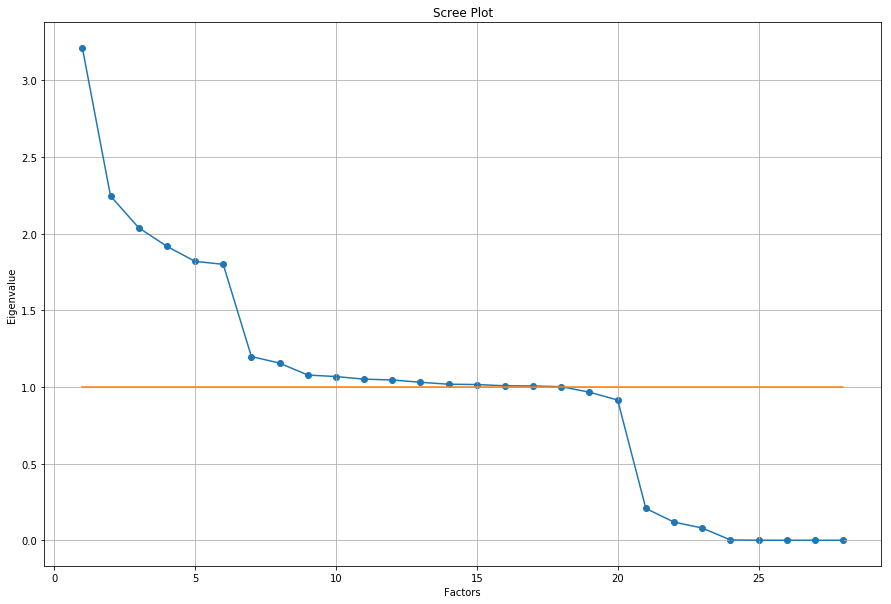

In [32]:
plt.figure(figsize = (15,10))
plt.scatter(range(1,DATA_SRC[columnsSelected].shape[1]+1),ev)
plt.plot(range(1,DATA_SRC[columnsSelected].shape[1]+1),ev)
plt.plot(range(1,DATA_SRC[columnsSelected].shape[1]+1),[1 for i in range(28)], )
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

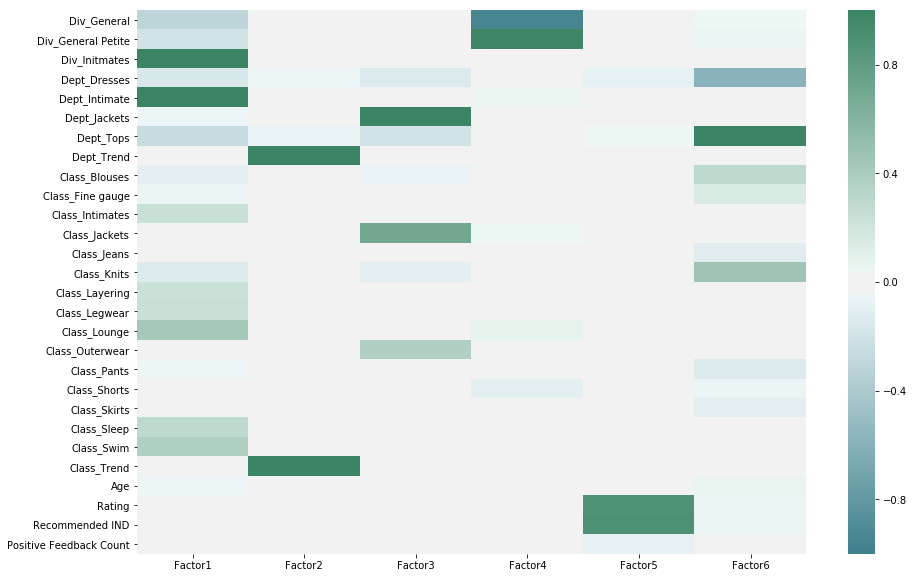

In [39]:
plt.figure(figsize = (15, 10))
sns.heatmap(fa.loadings[filtrZmienneSkorelowane], center=0, vmin = -1, vmax = 1, cmap = sns.diverging_palette(-150, 150, as_cmap=True))
plt.show()

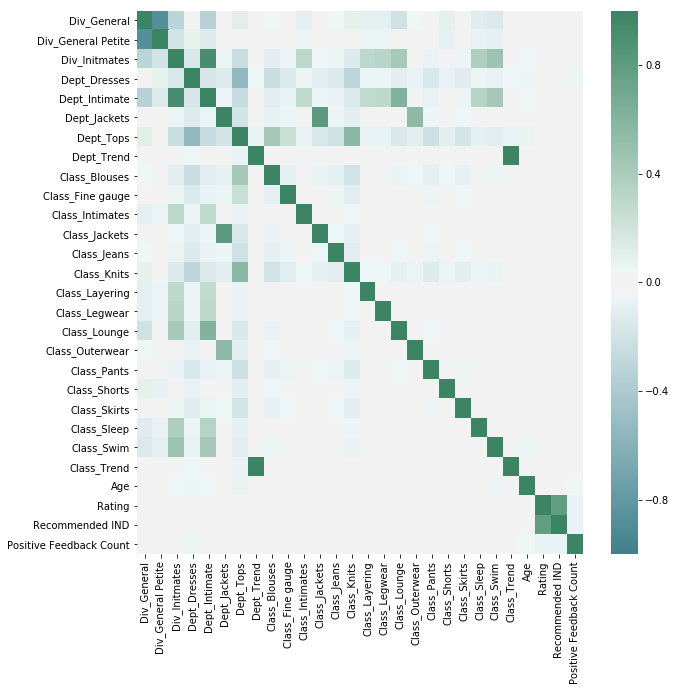

In [34]:
plt.figure(figsize = (10, 10))
sns.heatmap(DATA_SRC[zmienneSkorelowane].corr(), center=0, vmin = -1, vmax = 1, cmap = sns.diverging_palette(-150, 150, as_cmap=True))
plt.show()

In [35]:
print(len(columnsSelected))
fa.get_factor_variance()

28


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,2.881451,2.002965,1.804096,1.879699,1.597059,1.733448
Proportion Var,0.102909,0.071534,0.064432,0.067132,0.057038,0.061909
Cumulative Var,0.102909,0.174443,0.238875,0.306008,0.363045,0.424954
